In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d
from PIL import Image, ImageEnhance

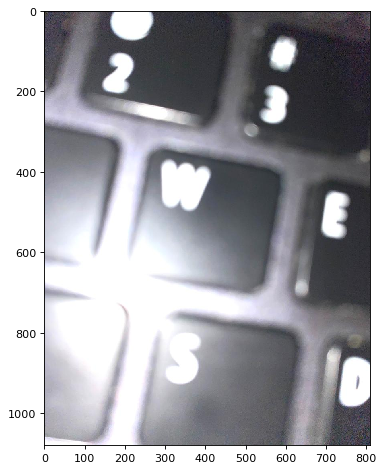

In [205]:
image_path = 'Exposure_img2.jpeg'           #Underexposed_2        blur_image_3
image = imread(image_path)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(image);

### Checking

In [206]:
def is_blurry(image, threshold=150):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
    return laplacian_var < threshold

blurry = is_blurry(image)
print(f"Is the image blurry? {'Yes' if blurry else 'No'}")

Is the image blurry? Yes


In [207]:
def is_overexposed(image, threshold=150, percentage=0.4):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    overexposed_pixels = np.sum(gray > threshold)
    total_pixels = gray.size
    return overexposed_pixels / total_pixels > percentage

overexposed = is_overexposed(image)
print(f"Is the image overexposed? {'Yes' if overexposed else 'No'}")

Is the image overexposed? Yes


In [208]:
def is_underexposed(image, threshold=30, percentage=0.5):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    underexposed_pixels = np.sum(gray < threshold)
    total_pixels = gray.size
    return underexposed_pixels / total_pixels > percentage

underexposed = is_underexposed(image)
print(f"Is the image underexposed? {'Yes' if underexposed else 'No'}")

Is the image underexposed? No


### Correction Function

In [235]:
# Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

def multi_convolver(image, kernel, iterations):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary = 'fill', fillvalue = 0)
    return image

def convolver_rgb(image, kernel, iterations = 1):
    # convert img to Y’UV color space to perform convolution
    img_yuv = rgb2yuv(image)   
    img_yuv[:,:,0] = multi_convolver(img_yuv[:,:,0], kernel, iterations)
    final_image = yuv2rgb(img_yuv)
    
    plt.figure(figsize=(17, 10))

    plt.subplot(1, 2, 1)
    plt.title("Blur Image")
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Enhanced Image")
    plt.imshow(final_image)
    plt.axis('off')

    plt.show()
                            
    return final_image

In [236]:
#overexposed_image = Image.open(image_path)

def reduce_exposure(image):
    
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)
        
    # Step 1: Reduce brightness to correct overexposure
    brightness_enhancer = ImageEnhance.Brightness(image)
    corrected_brightness = brightness_enhancer.enhance(0.7)  # Reducing brightness

    # Step 2: Adjust contrast to restore details
    contrast_enhancer = ImageEnhance.Contrast(corrected_brightness)
    corrected_contrast = contrast_enhancer.enhance(1.5)  # Increasing contrast

    # Step 3: Further adjustments (optional)
    # Saturation can be adjusted to bring back color
    saturation_enhancer = ImageEnhance.Color(corrected_contrast)
    final_image = saturation_enhancer.enhance(1.2)  # Increasing saturation slightly
    
    plt.figure(figsize=(17, 10))

    plt.subplot(1, 2, 1)
    plt.title("Overexposed Image")
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Enhanced Image")
    plt.imshow(final_image)
    plt.axis('off')

    plt.show()
    
    return final_image


In [237]:
#underexposed_image = Image.open(image_path)

def brighten_image(image):
    
    if isinstance(image, np.ndarray):
        image = Image.fromarray(image)
        
    # Step 1: Increase brightness to correct underexposure
    brightness_enhancer = ImageEnhance.Brightness(underexposed_image)
    corrected_brightness = brightness_enhancer.enhance(1.5)  # Increasing brightness

    # Step 2: Adjust contrast to enhance details
    contrast_enhancer = ImageEnhance.Contrast(corrected_brightness)
    corrected_contrast = contrast_enhancer.enhance(1.5)  # Increasing contrast

    # Step 3: Fine-tune the image (optional)
    saturation_enhancer = ImageEnhance.Color(corrected_contrast)
    final_image = saturation_enhancer.enhance(1.2)  # Increasing saturation slightly

    plt.figure(figsize=(17, 10))

    plt.subplot(1, 2, 1)
    plt.title("Underexposed Image")
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Enhanced Image")
    plt.imshow(final_image)
    plt.axis('off')

    plt.show()
    
    return final_image

### Algorithm

In [238]:
def analyze_and_correct(image):
        
    if is_blurry(image):
        print("Image is blurry. Applying sharpening...")
        image = convolver_rgb(image, sharpen, iterations = 1)
        
    if image.dtype == np.float64:
        image = (image * 255).astype(np.uint8)
    
    if is_overexposed(image):
        print("Image is overexposed. Reducing exposure...")
        image = reduce_exposure(image)
        
    if is_underexposed(image):
        print("Image is underexposed. Brightening the image...")
        image = brighten_image(image)
    
    return image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image is blurry. Applying sharpening...


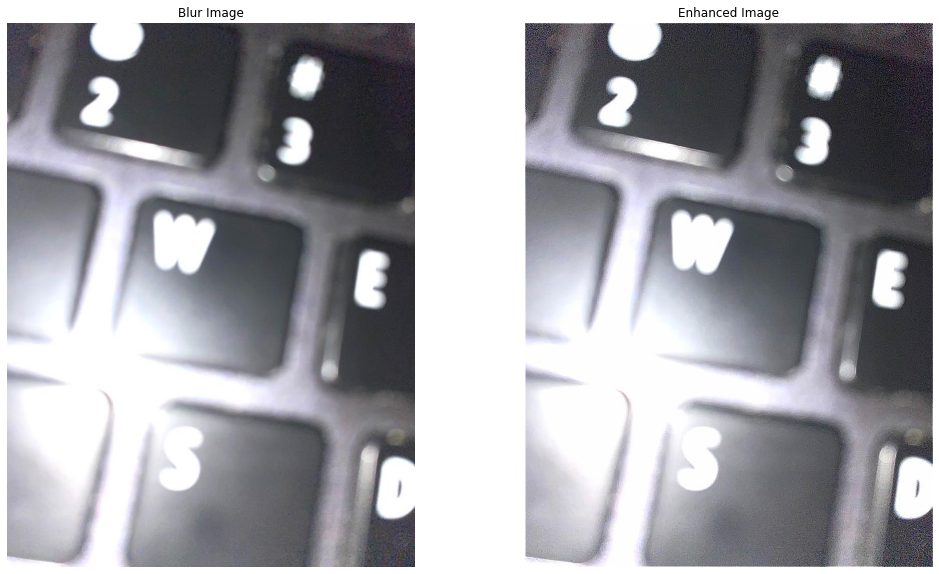

Image is overexposed. Reducing exposure...


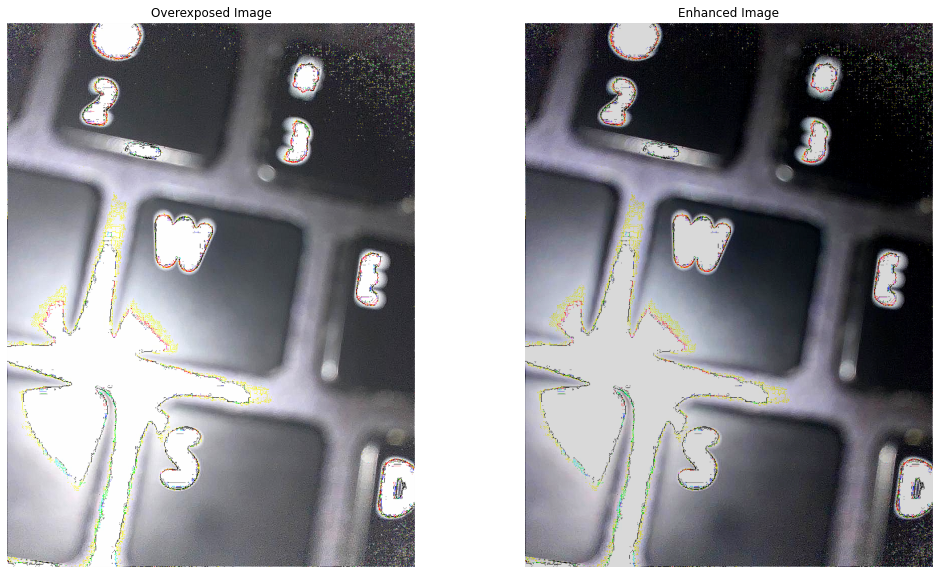

TypeError: Expected Ptr<cv::UMat> for argument 'src'

In [239]:
image2 = analyze_and_correct(image)